# Understanding and Calculating Equity Beta with Python

Equity Beta is an essential metric that every investor and financial analyst needs to grasp. It serves as a measure of how sensitive a company's stock price is to movements in the overall market. Understanding this concept can drastically improve your investment strategies, particularly in portfolio management, as it provides insight into the risk and expected return relationship of different stocks.

## What is Equity Beta?

### Definition and Importance

Equity Beta, denoted as β, measures the sensitivity of a stock's returns to the returns of a benchmark index (usually the overall market). It is a critical component of the Capital Asset Pricing Model (CAPM), which is widely used to determine the expected return of an asset based on its risk relative to the market. Knowing a stock’s beta allows investors to manage their risk exposure effectively.

### Key Formula

The formula for Equity Beta (β) is:

$$
\beta = \frac{\text{Covariance(Return of the stock, Return of the market)}}{\text{Variance(Return of the market)}} 
$$

### Interpreting Beta

- β = 1: The stock moves with the market.
- β > 1: The stock is more volatile than the market (higher risk and potential return).
- β < 1: The stock is less volatile than the market (lower risk and potential return).

Understanding these key points is vital for making informed investment decisions.

## Analysing Apple vs SPY

### Historical Price Chart

To begin, let's look at the historical closing prices of Apple (AAPL) and the S&P 500 ETF (SPY). This comparison will provide a foundational understanding of how Apple's stock price movements compare to the overall market trend.

In [1]:
%%capture
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('getting_started-chart.mplstyle')

# Download historical data for AAPL and SPY
data = yf.download(["AAPL", "SPY"], start="2019-08-01", end="2024-08-01")['Adj Close']
data = data / data.iloc[0,:] * 100

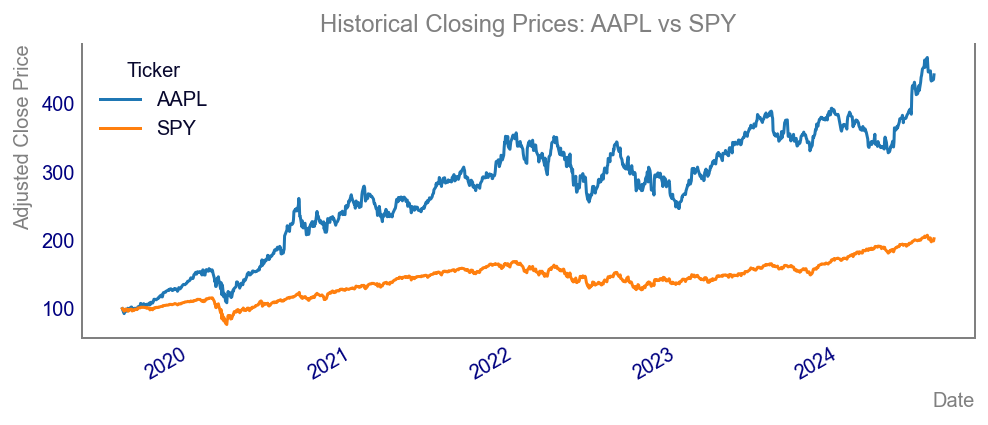

In [2]:


# Plot the historical closing prices
data.plot()
plt.title("Historical Closing Prices: AAPL vs SPY")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()

### MACD Chart

Next, let's visualise the Moving Average Convergence Divergence (MACD) for Apple stock against SPY, using a 50-day and 200-day moving average. This chart helps identify the momentum and trend strength of Apple's stock.

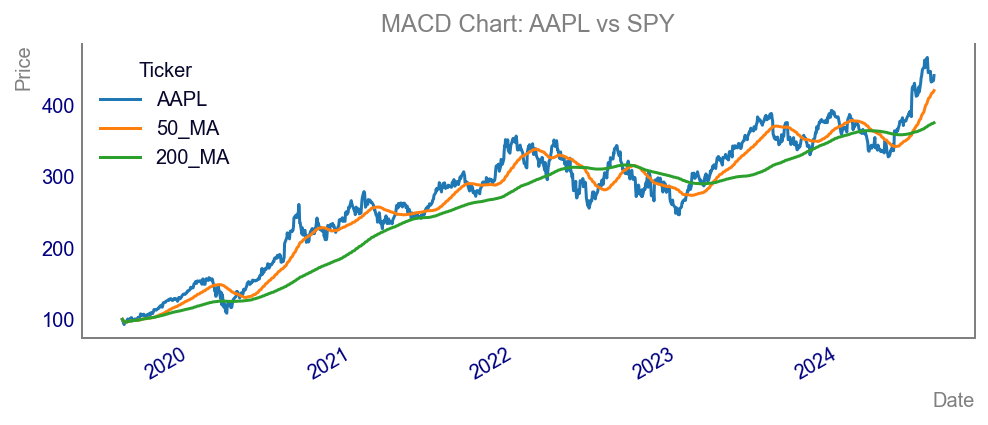

In [3]:
# Calculate moving averages
short_window = 50
long_window = 200

data['50_MA'] = data['AAPL'].rolling(window=short_window, min_periods=1).mean()
data['200_MA'] = data['AAPL'].rolling(window=long_window, min_periods=1).mean()

# Plot the MACD chart
fig, ax = plt.subplots()
data[['AAPL', '50_MA', '200_MA']].plot(ax=ax)
plt.title("MACD Chart: AAPL vs SPY")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Scatter Plot of Daily Returns

Now, let’s examine a scatter plot of the daily returns of Apple against the daily returns of SPY over the past five years. This will illustrate the correlation between the two assets and serve as a precursor to calculating the stock's sensitivity relative to the market.

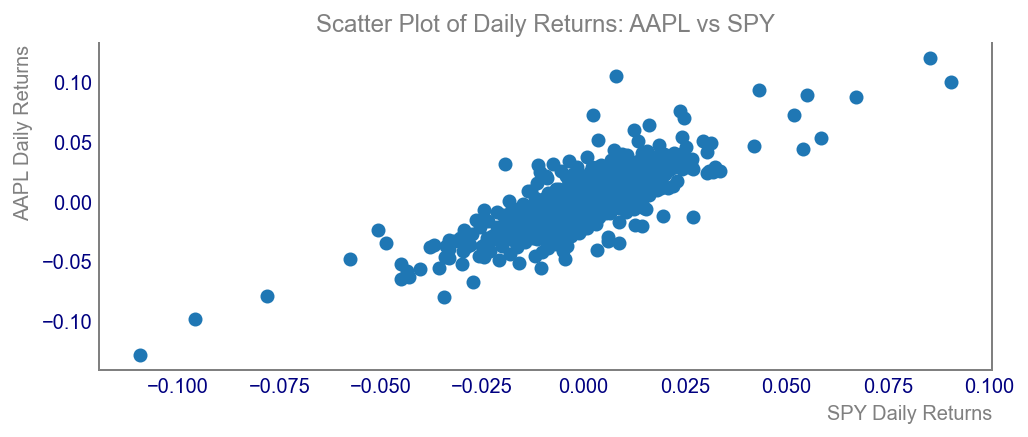

In [4]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Scatter plot of daily returns
plt.scatter(returns['SPY'], returns['AAPL'])
plt.title("Scatter Plot of Daily Returns: AAPL vs SPY")
plt.xlabel("SPY Daily Returns")
plt.ylabel("AAPL Daily Returns")
plt.show()

### Volatility Comparison Chart

Let's build a volatility comparison chart that shows the standard deviation of the daily returns for Apple and SPY. This chart will emphasize the relative risk of investing in Apple versus the overall market.

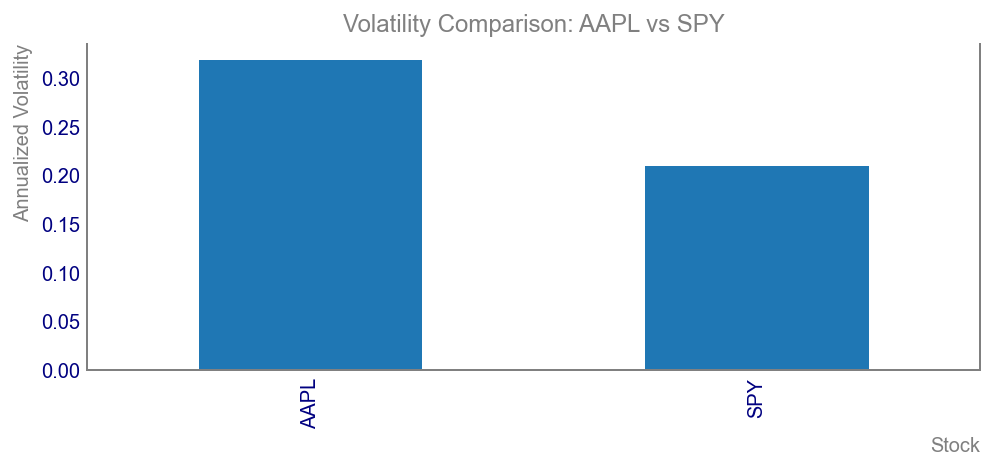

In [5]:
volatility = returns.std() * (252 ** 0.5)
volatility.iloc[0:2].plot(kind='bar')
plt.title("Volatility Comparison: AAPL vs SPY")
plt.xlabel("Stock")
plt.ylabel("Annualized Volatility")
plt.show()

### Regression Line Chart

We will now plot a regression line by regressing Apple's daily returns against SPY’s daily returns. This chart highlights the linear relationship between the returns of Apple and the market, preparing us for calculating the equity beta as the slope of the regression line.

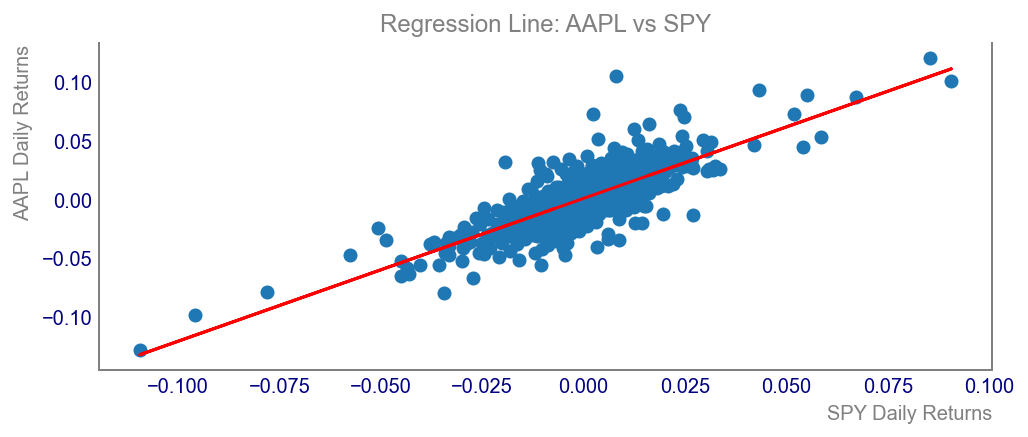

In [6]:
import statsmodels.api as sm

X = sm.add_constant(returns['SPY'])
model = sm.OLS(returns['AAPL'], X).fit()
line = model.predict(X)

# Plot regression line
plt.scatter(returns['SPY'], returns['AAPL'])
plt.plot(returns['SPY'], line, color='red')
plt.title("Regression Line: AAPL vs SPY")
plt.xlabel("SPY Daily Returns")
plt.ylabel("AAPL Daily Returns")
plt.show()

### Rolling Beta Calculation Chart

We will now calculate and plot the beta for Apple over time using a 2-year rolling window. This chart will show how Apple's risk profile changes in relation to the market over time.

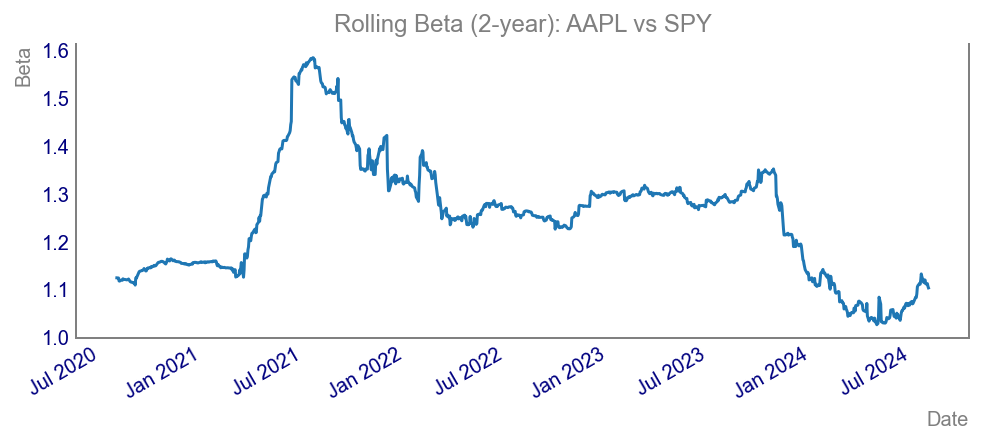

In [7]:
# Rolling beta calculation
window = 252  # 2-year window
rolling_beta = returns['AAPL'].rolling(window).cov(returns['SPY']) / returns['SPY'].rolling(window).var()

# Plot rolling beta
rolling_beta.plot()
plt.title("Rolling Beta (2-year): AAPL vs SPY")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.show()

### Beta Comparison: Apple vs Exxon

Finally, let's compare the equity betas of Apple and Exxon (XOM). This comparison will highlight discrepancies in risk profiles between a high-tech sector stock like Apple and an energy sector stock like Exxon.

In [8]:
%%capture
# Download historical data for XOM
data_exxon = yf.download(["XOM", "SPY"], start="2019-08-01", end="2024-08-01")['Adj Close']

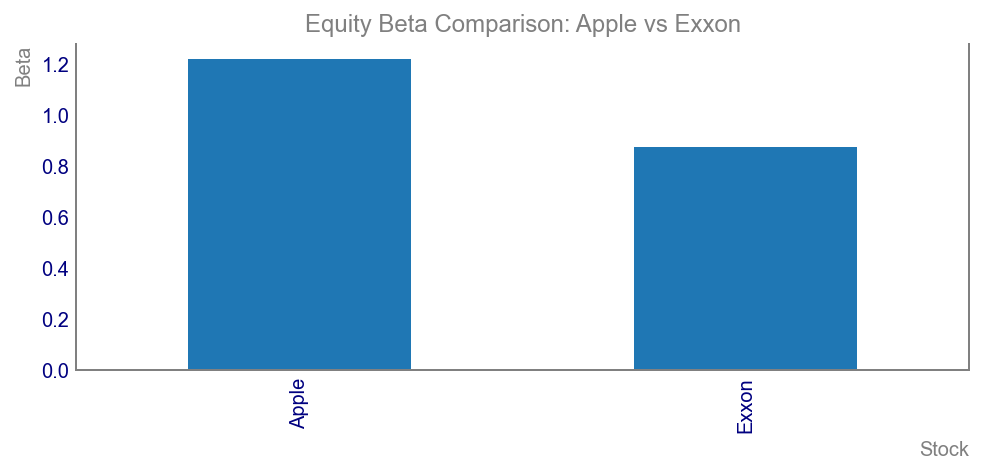

In [9]:
# Calculate daily returns for XOM
returns_exxon = data_exxon.pct_change().dropna()

# Regression for XOM
X_exxon = sm.add_constant(returns_exxon['SPY'])
model_exxon = sm.OLS(returns_exxon['XOM'], X_exxon).fit()
beta_exxon = model_exxon.params['SPY']

# Compare betas
betas = pd.Series({'Apple': model.params['SPY'], 'Exxon': beta_exxon})
betas.plot(kind='bar')
plt.title("Equity Beta Comparison: Apple vs Exxon")
plt.xlabel("Stock")
plt.ylabel("Beta")
plt.show()

## Conclusion

Understanding Equity Beta is vital for assessing risk and making informed investment decisions. By knowing the beta, investors can manage portfolios by balancing high and low beta stocks, ultimately aiming for a desired risk level. However, it's essential to note the limitations of beta, such as its reliance on historical data and its assumption of a linear relationship between stock and market returns. For in-depth exploration, refer to the following sources:

- [Investopedia on Beta](https://www.investopedia.com/terms/b/beta.asp)

For a visual guide, watch the corresponding video on the Data Driven Minutes YouTube channel.